In [7]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
#libraries for cross validation,train test split,hyperparameter tuning
from sklearn.model_selection import cross_val_score,cross_val_predict, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif


#libraries for performance metrics
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score,RocCurveDisplay, log_loss


#libraries to regulate warnings
import warnings
warnings.filterwarnings("ignore")



In [8]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip --version

pip 23.3.1 from C:\Users\Karthikraj\anaconda3\Lib\site-packages\pip (python 3.11)

Note: you may need to restart the kernel to use updated packages.


In [11]:
df=pd.read_csv('diabetes.csv')

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.shape

(768, 9)

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
#Exploratory Data Analysis

df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [16]:
#0--->non diabetic
#1-->Diabetic

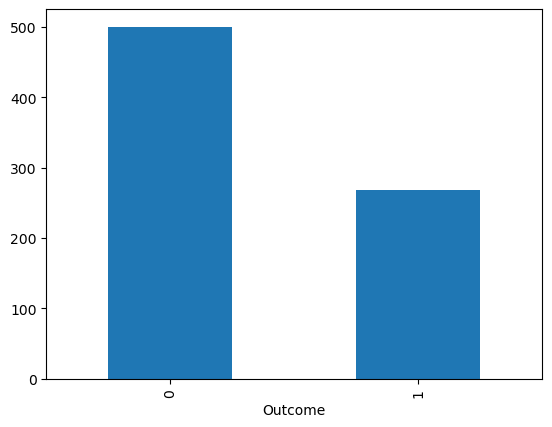

In [17]:
# Data Visualization
#Checking the balance of the data by count the Outcomes
p=df.Outcome.value_counts().plot(kind="bar")

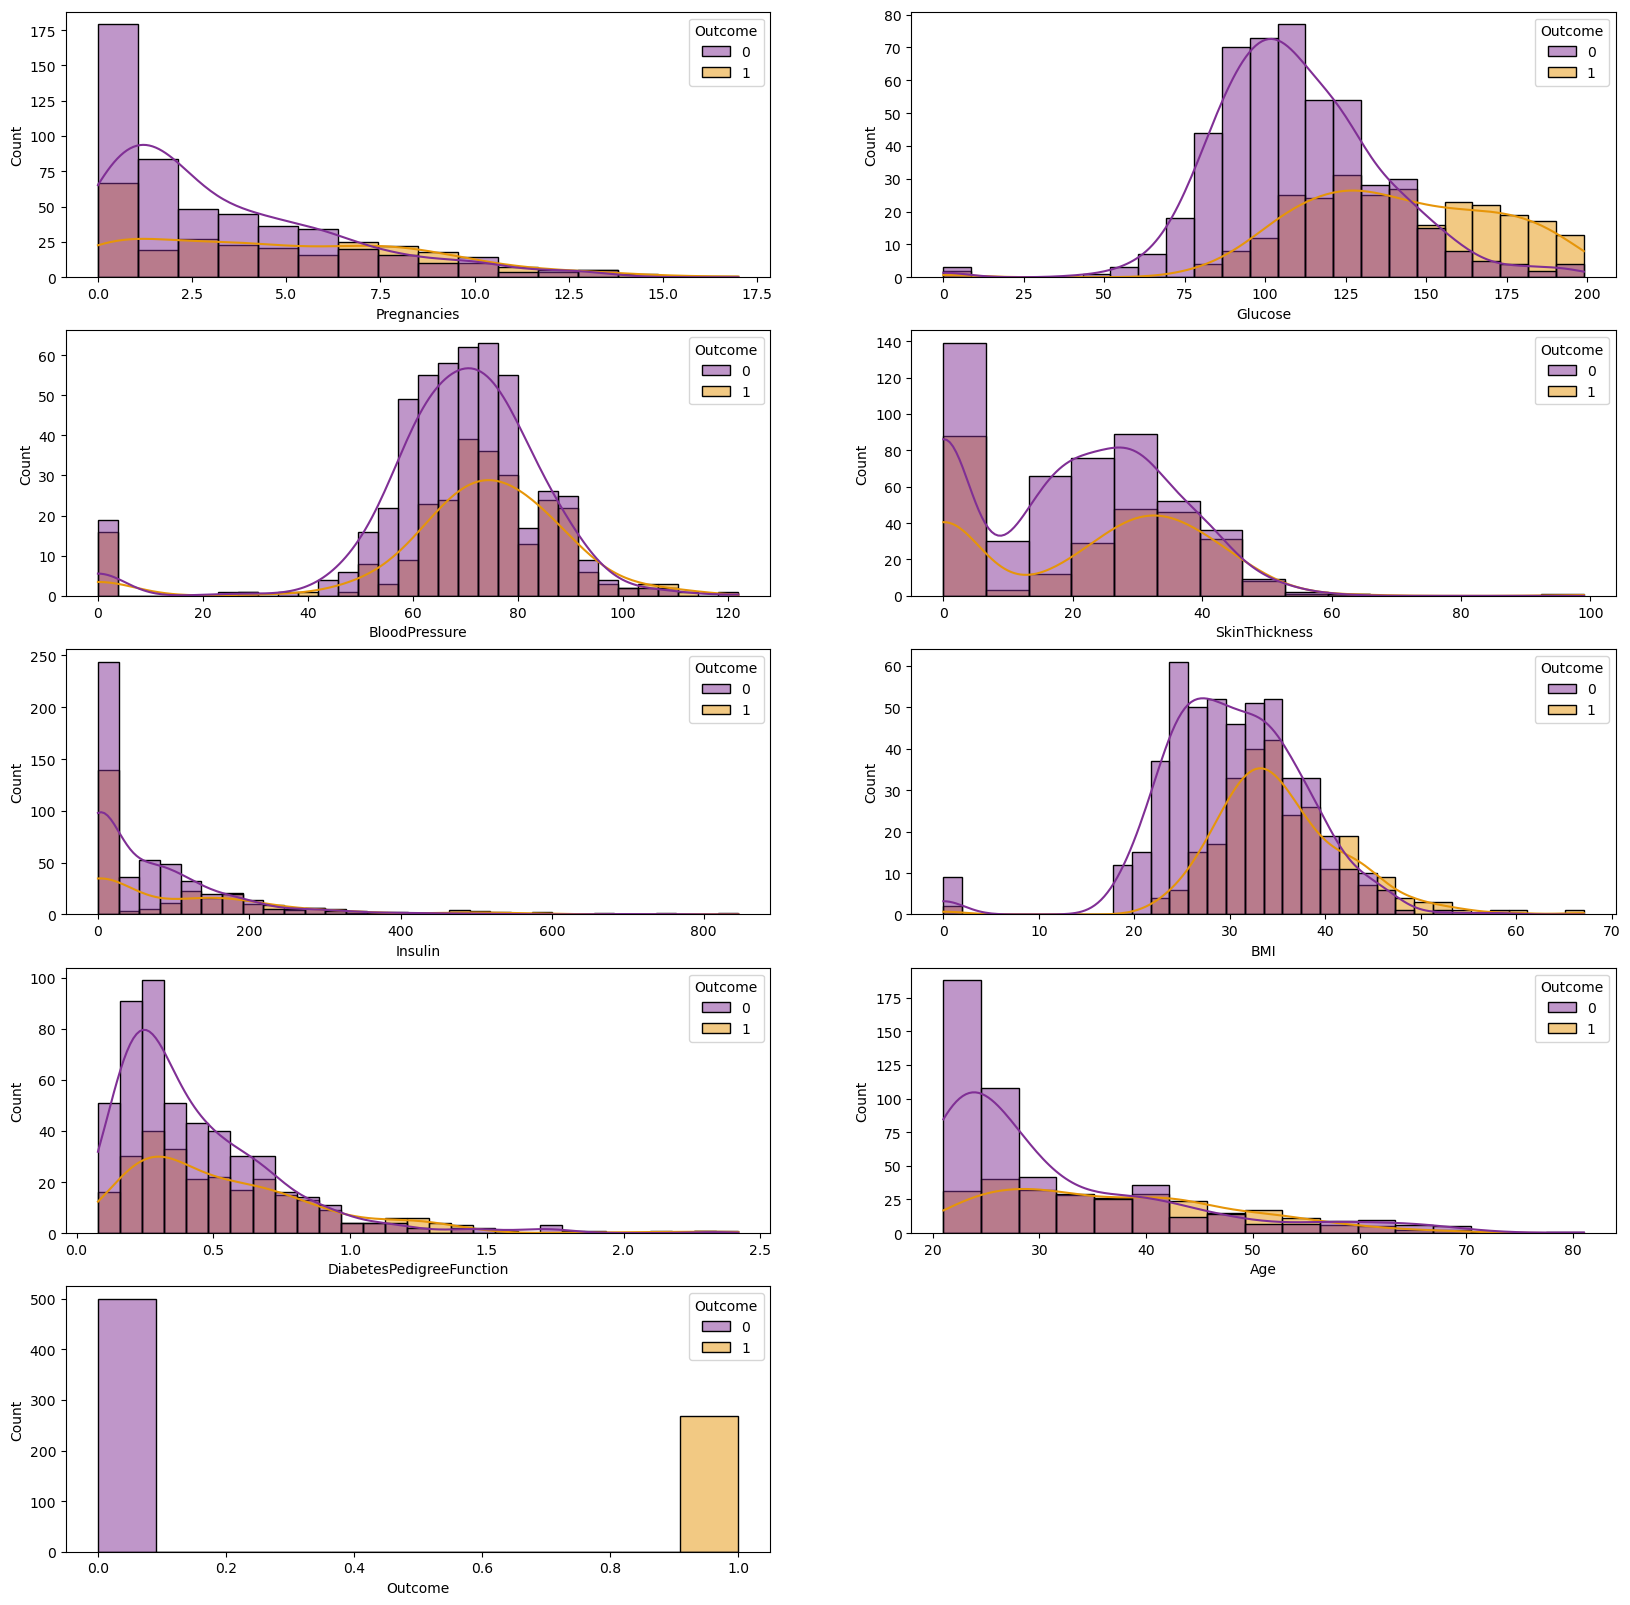

In [18]:
#plotting data distribution plots before removing Nan values
Updated_title = [title for title in df.loc[:,:].columns]
plt.figure(figsize=(20,20))
i = 1;
for title in Updated_title:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=title, hue="Outcome",kde=True,palette="CMRmap")
    i = i + 1


In [19]:
'''Updated_title = [title for title in df.loc[:,:'Age'].columns]
plt.figure(figsize=(30,50))
i = 1;
for title in Updated_title:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=title, hue="Outcome",kde=True,palette="CMRmap")
    i = i + 1'''

'Updated_title = [title for title in df.loc[:,:\'Age\'].columns]\nplt.figure(figsize=(30,50))\ni = 1;\nfor title in Updated_title:\n    plt.subplot(5,2,i)\n    sns.histplot(data=df, x=title, hue="Outcome",kde=True,palette="CMRmap")\n    i = i + 1'

In [20]:
#Finding out any null values present in dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
#we conclude no null values in dataset eventhough we have 0 values in dataset

In [57]:
df_copy=df.copy(deep=True)
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']]=df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0,np.NaN)
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [58]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)
print(df_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [135]:
print(df_copy)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [60]:
#we removed o values as well

In [61]:
#Now we can compare values before and after removing NaN values

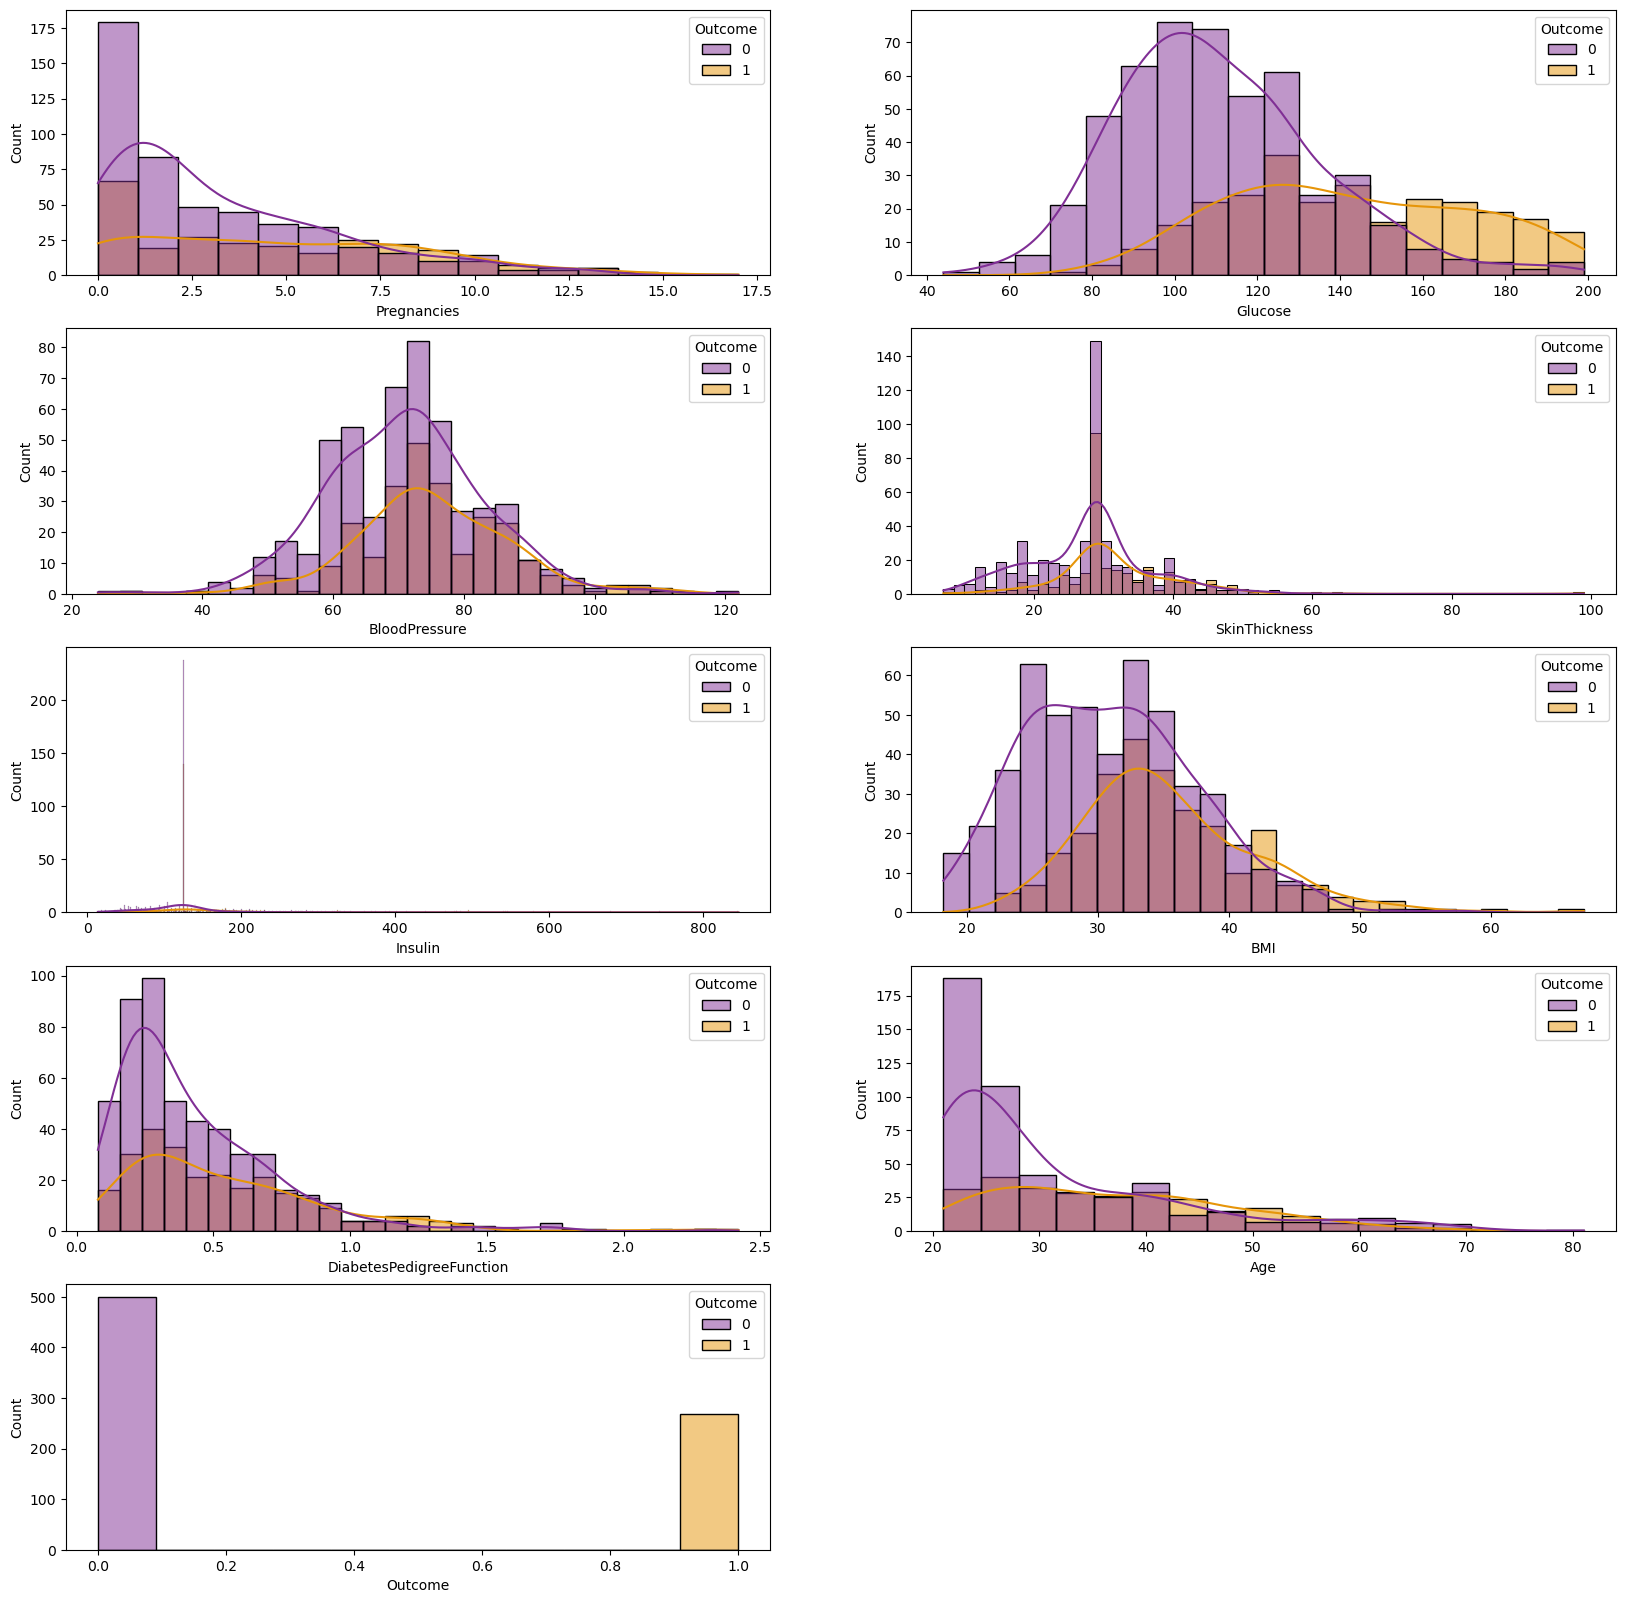

In [62]:
#plotting data distribution plots
Updated_title = [title for title in df.loc[:,:].columns]
plt.figure(figsize=(20,20))
i = 1;
for title in Updated_title:
    plt.subplot(5,2,i)
    sns.histplot(data=df_copy, x=title, hue="Outcome",kde=True,palette="CMRmap")
    i = i + 1

In [63]:
print(df._get_numeric_data().columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.081770   
Glucose                      0.127911  1.000000       0.218367       0.192686   
BloodPressure                0.208522  0.218367       1.000000       0.191853   
SkinThickness                0.081770  0.192686       0.191853       1.000000   
Insulin                      0.025047  0.419064       0.045087       0.155610   
BMI                          0.021559  0.231128       0.281199       0.543205   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.102188   
Age                          0.544341  0.266534       0.324595       0.126107   
Outcome                      0.221898  0.492928       0.166074       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.021559                 -0.033523   
Glucose                   0.419064  0.231

Text(0.5, 1.0, 'Correlation Matrix')

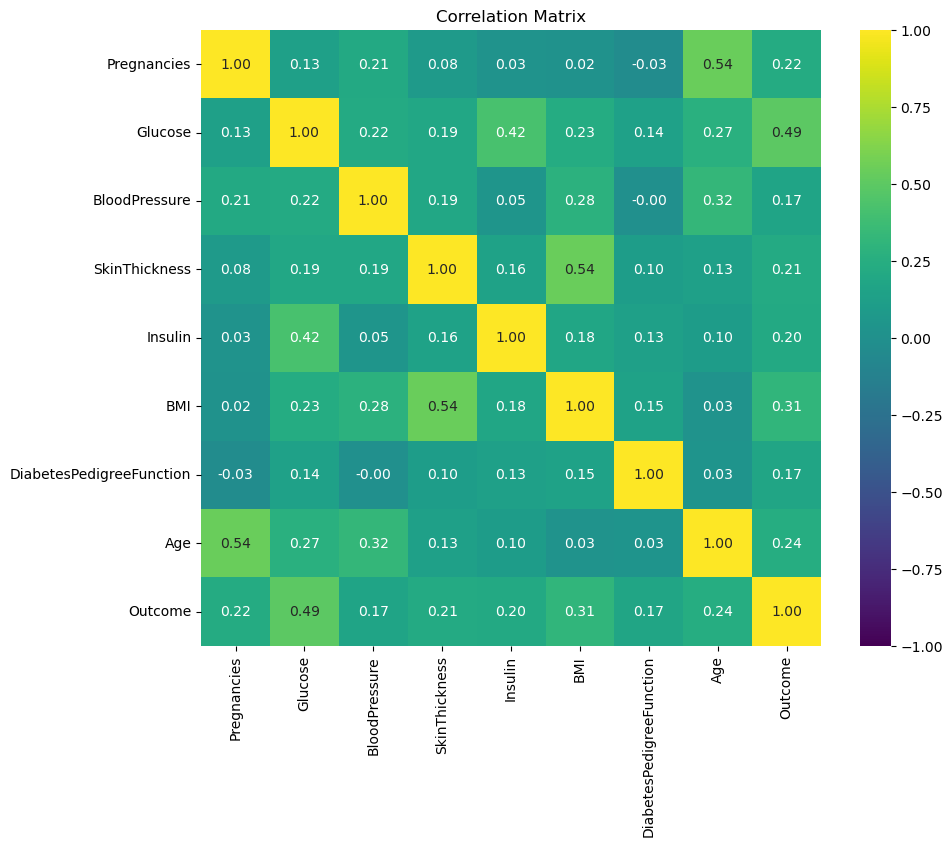

In [137]:
#Correlation Matrix
#print(df.isnull().sum())
plt.figure(figsize=(10,8))
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
correlation =df_copy[cols].corr()
print(correlation)
p=sns.heatmap(correlation, annot=True,annot_kws={"size": 10},fmt='.2f', cmap='viridis',vmin=-1,vmax=1)
#sns.heatmap(df.corr(), annot=True, annot_kws={"size": 15},cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
#plt.savefig('correlation_matrix.png')
#plt.show()


<Axes: >

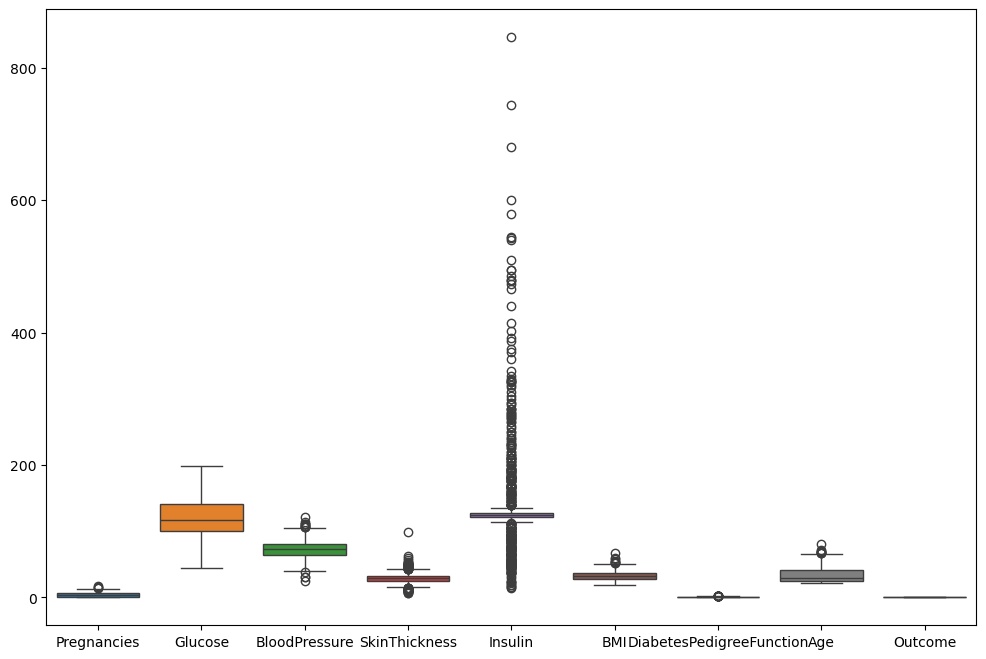

In [65]:
# Checking the Outliers 

plt.figure(figsize=(12,8))
sns.boxplot(df_copy)           
           

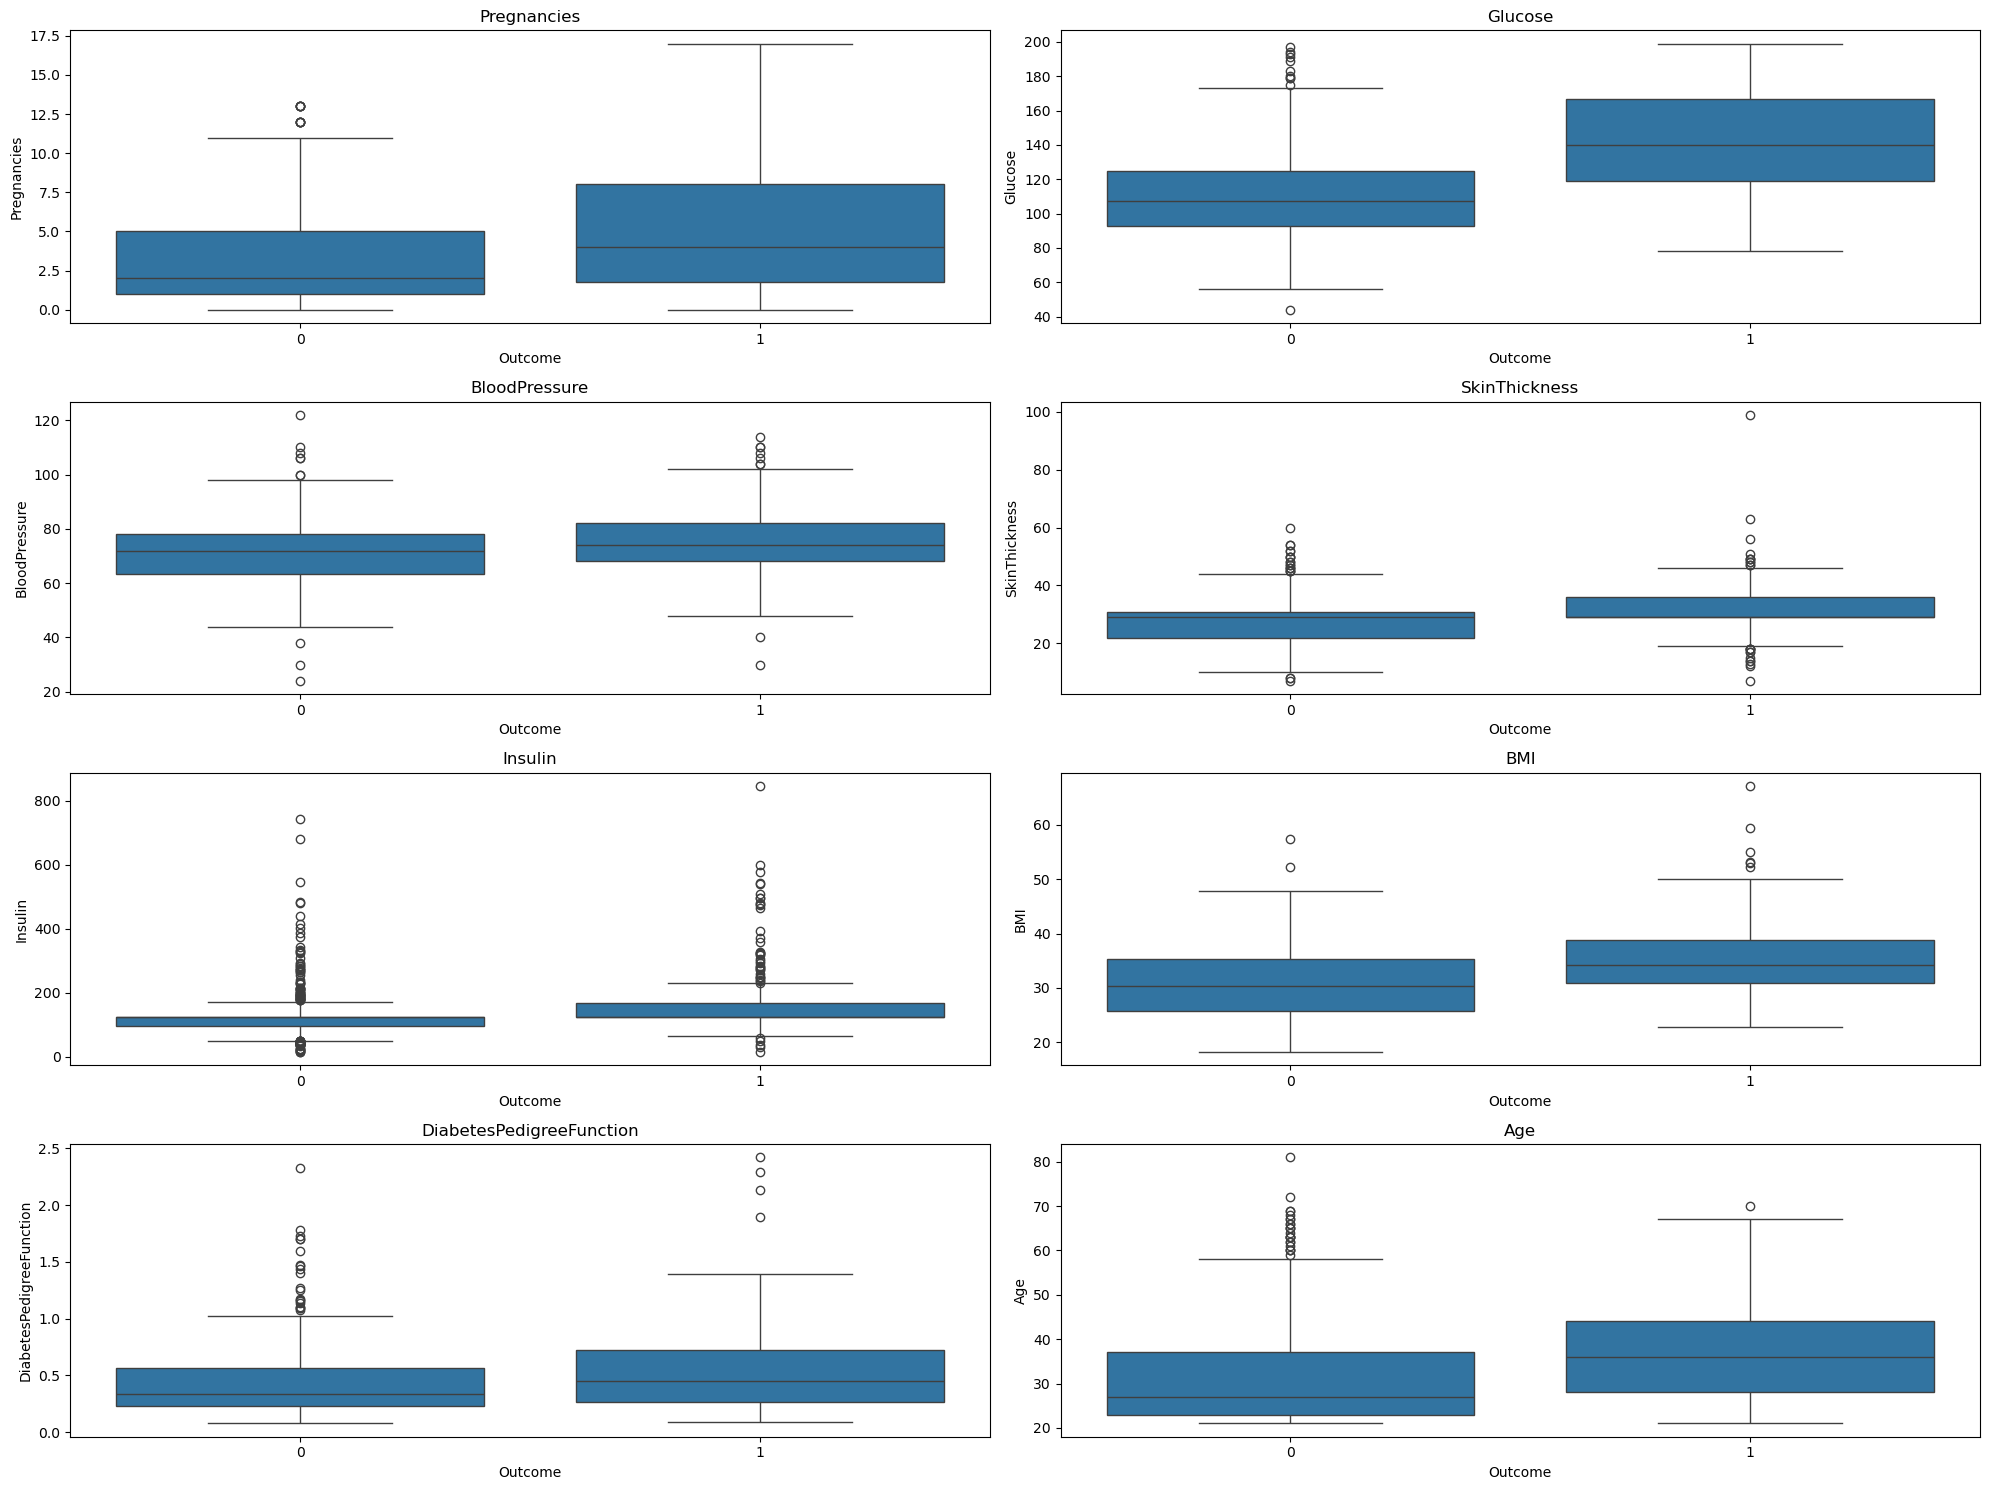

In [66]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
fig, axes = plt.subplots(nrows=4,ncols=2, figsize=(20, 15))
# Iterate through each column and create a box plot
# Use two indices to access the correct subplot
for i, col in enumerate(cols):
    sns.boxplot(df_copy,x = 'Outcome',y=col, ax=axes[i//2, i%2])  
    axes[i//2, i%2].set_title(col)
        
plt.tight_layout()
plt.show()

In [67]:
#Removal of Outliers
Q1 = np.percentile(df_copy, 25)
Q3 = np.percentile(df_copy, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_data = df_copy[(df_copy >= lower_bound) & (df_copy <= upper_bound)]
print(cleaned_data)
print('IQR: {}'.format(IQR))
print('Lower Bound: {}'.format(lower_bound))
print('Upper Bound: {}'.format(upper_bound))
print('Number of Values after outliers removal: {}'.format(df_copy.Outcome.value_counts()))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [68]:
new_df=df_copy

In [69]:
#Feature Scaling
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(new_df.drop(columns='Outcome',axis=1),),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [70]:
#Train_Test_Split

Y=new_df.Outcome
Y


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 42, stratify = Y )

In [72]:
X.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((768, 8), (512, 8), (256, 8), (512,), (256,))

In [73]:
#Training the model

classifier=SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [74]:
#Model Evaluation 
#Accuracy score for Train data

X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print("Training_data_accuracy:",training_data_accuracy)

Training_data_accuracy: 0.787109375


In [75]:
#Accuracy score for Test data
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("Test_data_accuracy:",test_data_accuracy)

Test_data_accuracy: 0.734375


In [76]:
#model 1
model1=LogisticRegression()
model1.fit(X_train,Y_train)
Y_predict_model1=model1.predict(X_test)
Accuracy=accuracy_score(Y_test,Y_predict_model1)

In [77]:
print("Accuracy score of Logistic Regression:",Accuracy)

Accuracy score of Logistic Regression: 0.73046875


In [78]:
score=cross_val_score(model1,X,Y,cv=5)
score=np.mean(score)
print("Cross Validation score of Logistic Regression:",score)

Cross Validation score of Logistic Regression: 0.7708598590951532


In [79]:
#Model2
model2=DecisionTreeClassifier()
model2.fit(X_train,Y_train)
Y_predict_model2=model2.predict(X_test)
Accuracy=accuracy_score(Y_test,Y_predict_model2)
print("Accuracy score of Decision Tree classifier:",Accuracy)

Accuracy score of Decision Tree classifier: 0.6953125


In [80]:
score=cross_val_score(model2,X,Y,cv=5)
score=np.mean(score)
print("Cross Validation score of Decision Tree:",score)

Cross Validation score of Decision Tree: 0.7149987267634327


In [81]:
#model3
model3=RandomForestClassifier()
model3.fit(X_train,Y_train)
Y_predict_model3=model3.predict(X_test)
Accuracy=accuracy_score(Y_test,Y_predict_model3)
print("Accuracy score of Random Forest:",Accuracy)

Accuracy score of Random Forest: 0.7421875


In [82]:
score=cross_val_score(model3,X,Y,cv=5)
score=np.mean(score)
print("Cross Validation score of Random Forest:",score)

Cross Validation score of Random Forest: 0.746125116713352


In [83]:
#model4
model4=KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train,Y_train)
Y_predict_model4=model4.predict(X_test)
Accuracy=accuracy_score(Y_test,Y_predict_model4)
print("Accuracy score of Kneighbors classifier:",Accuracy)

Accuracy score of Kneighbors classifier: 0.74609375


In [84]:
score=cross_val_score(model4,X,Y,cv=3)
score=np.mean(score)
print("Cross Validation score of KNeighbors classifier:",score)

Cross Validation score of KNeighbors classifier: 0.72265625


In [85]:
#Classification Report for All models

def generation_classification_report(model_name,Y_test,Y_pred):
     report=classification_report(Y_test,Y_pred)
     print(f"classification report for{model_name}:\n {report}\n")
generation_classification_report(model1,Y_test,Y_predict_model1)
generation_classification_report(model2,Y_test,Y_predict_model2)
generation_classification_report(model3,Y_test,Y_predict_model3)
generation_classification_report(model4,Y_test,Y_predict_model4)

classification report forLogisticRegression():
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       167
           1       0.64      0.53      0.58        89

    accuracy                           0.73       256
   macro avg       0.70      0.68      0.69       256
weighted avg       0.72      0.73      0.72       256


classification report forDecisionTreeClassifier():
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       167
           1       0.57      0.52      0.54        89

    accuracy                           0.70       256
   macro avg       0.66      0.65      0.66       256
weighted avg       0.69      0.70      0.69       256


classification report forRandomForestClassifier():
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       167
           1       0.65      0.57      0.61        89

    accuracy                

In [86]:
#we see there is difference between recall and f1 score,so we are performing random sampler below
Oversampler=RandomOverSampler(random_state=42)

X_resampled,Y_resampled=Oversampler.fit_resample(X,Y)

df_resampled=pd.concat([pd.DataFrame(X_resampled,columns=X.columns),pd.Series(Y_resampled,name="Outcome")],axis=1)

In [87]:
X_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-3.351824e-02,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-5.298590e-01,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-6.953060e-01,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-5.298590e-01,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669e+00,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
995,-0.844885,0.010298,-6.953060e-01,0.329171,0.177559,0.384938,0.664800,-0.275760
996,-1.141852,0.306194,1.175571e-15,-0.012301,-0.181541,1.563857,-0.609690,-0.616111
997,1.233880,-0.055456,1.175571e-15,-0.012301,-0.181541,-0.357345,-0.872441,0.404942
998,0.046014,-0.351352,-3.351824e-02,2.036530,0.768338,0.676029,2.772843,1.936522


In [88]:
Y_resampled

0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Outcome, Length: 1000, dtype: int64

In [89]:
Y_resampled.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [90]:
#Afer Random sampling,Now the data set is balanced

In [91]:
X_resampled_train,X_resampled_test,Y_resampled_train,Y_resampled_test=train_test_split(X_resampled,Y_resampled,test_size=0.25,random_state=42)

In [92]:
#model 1
model1=LogisticRegression()
model1.fit(X_resampled_train,Y_resampled_train)
Y_predict_model1=model1.predict(X_resampled_test)
Accuracy=accuracy_score(Y_resampled_test,Y_predict_model1)
print("Accuracy score of Logistic Regression:",Accuracy)

Accuracy score of Logistic Regression: 0.736


In [93]:
#Model2
model2=DecisionTreeClassifier()
model2.fit(X_resampled_train,Y_resampled_train)
Y_predict_model2=model2.predict(X_resampled_test)
Accuracy=accuracy_score(Y_resampled_test,Y_predict_model2)
print("Accuracy score of Decision Tree classifier:",Accuracy)

Accuracy score of Decision Tree classifier: 0.8


In [94]:
#model3
model3=RandomForestClassifier()
model3.fit(X_resampled_train,Y_resampled_train)
Y_predict_model3=model3.predict(X_resampled_test)
Accuracy=accuracy_score(Y_resampled_test,Y_predict_model3)
print("Accuracy score of Random Forest:",Accuracy)

Accuracy score of Random Forest: 0.812


In [95]:
#model4
model4=KNeighborsClassifier(n_neighbors=3)
model4.fit(X_resampled_train,Y_resampled_train)
Y_predict_model4=model4.predict(X_resampled_test)
Accuracy=accuracy_score(Y_resampled_test,Y_predict_model4)
print("Accuracy score of Kneighbors classifier:",Accuracy)

Accuracy score of Kneighbors classifier: 0.768


In [96]:
def generation_classification_report(model_name,Y_test,Y_pred):
     report=classification_report(Y_test,Y_pred)
     print(f"classification report for{model_name}:\n {report}\n")
generation_classification_report(model1,Y_resampled_test,Y_predict_model1)
generation_classification_report(model2,Y_resampled_test,Y_predict_model2)
generation_classification_report(model3,Y_resampled_test,Y_predict_model3)
generation_classification_report(model4,Y_resampled_test,Y_predict_model4)

classification report forLogisticRegression():
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       124
           1       0.73      0.75      0.74       126

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.74      0.74      0.74       250


classification report forDecisionTreeClassifier():
               precision    recall  f1-score   support

           0       0.84      0.74      0.79       124
           1       0.77      0.86      0.81       126

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250


classification report forRandomForestClassifier():
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       124
           1       0.78      0.87      0.82       126

    accuracy                

In [97]:
#after resampling,we balanced dataset and comparative to other models,Random forest has high accuracy and high scores in recall and f1-score.

In [99]:
#HyperParameter Tuning using Gridsearch CV with Random Forest classifier.
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [20,60,100,120],
    'max_depth': [2,8,None],
   'max_samples':[0.5,0.75,1.0],
    'max_features': [0.2,0.6,1.0]
   
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_resampled_train, Y_resampled_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on test set
best_rf = grid_search.best_estimator_
test_accuracy = best_rf.score(X_resampled_test, Y_resampled_test)
print("Test set accuracy with best model: {:.2f}".format(test_accuracy))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': None, 'max_features': 0.6, 'max_samples': 1.0, 'n_estimators': 120}
Best cross-validation score: 0.85
Test set accuracy with best model: 0.81


In [100]:

rf_classifier = RandomForestClassifier(**grid_search.best_params_, random_state=42)

In [101]:
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier)
    # Add more classifiers if desired
], voting='hard') 

In [102]:
voting_classifier.fit(X_resampled_train, Y_resampled_train)
test_accuracy = voting_classifier.score(X_resampled_test, Y_resampled_test)
print("Test set accuracy with voting classifier: {:.2f}".format(test_accuracy))

Test set accuracy with voting classifier: 0.81


In [103]:
Y_predictions_tuned = voting_classifier.predict(X_resampled_test)

In [104]:
Y_predictions_tuned

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [105]:
# Calculate metrics
accuracy = accuracy_score(Y_resampled_test, Y_predictions_tuned)
recall = recall_score(Y_resampled_test, Y_predictions_tuned)
precision = precision_score(Y_resampled_test, Y_predictions_tuned)
AUC_score = roc_auc_score(Y_resampled_test, Y_predictions_tuned)
f1 = f1_score(Y_resampled_test,Y_predictions_tuned)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("AUC Score:", AUC_score)
print("F1 Score:", f1)

Accuracy: 0.808
Recall: 0.8650793650793651
Precision: 0.7785714285714286
AUC Score: 0.8075396825396826
F1 Score: 0.8195488721804511


In [106]:
report = classification_report(Y_resampled_test,Y_predictions_tuned)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.75      0.79       124
           1       0.78      0.87      0.82       126

    accuracy                           0.81       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.81      0.81      0.81       250



In [107]:
#Confusion Matrix
cm = confusion_matrix(Y_resampled_test,Y_predictions_tuned)


<Figure size 800x600 with 0 Axes>

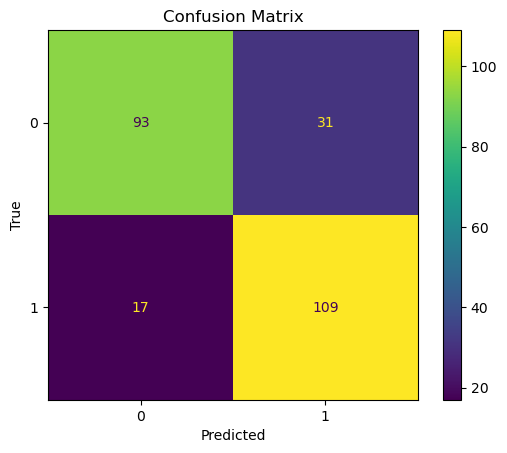

In [108]:
plt.figure(figsize=(8, 6))
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=voting_classifier.classes_)
display.plot()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

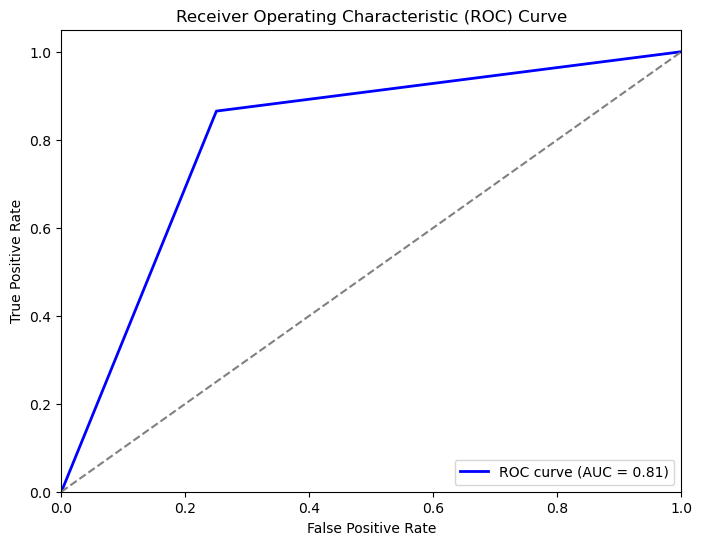

In [109]:
#ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(Y_resampled_test,Y_predictions_tuned)
roc_auc = roc_auc_score(Y_resampled_test, Y_predictions_tuned)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

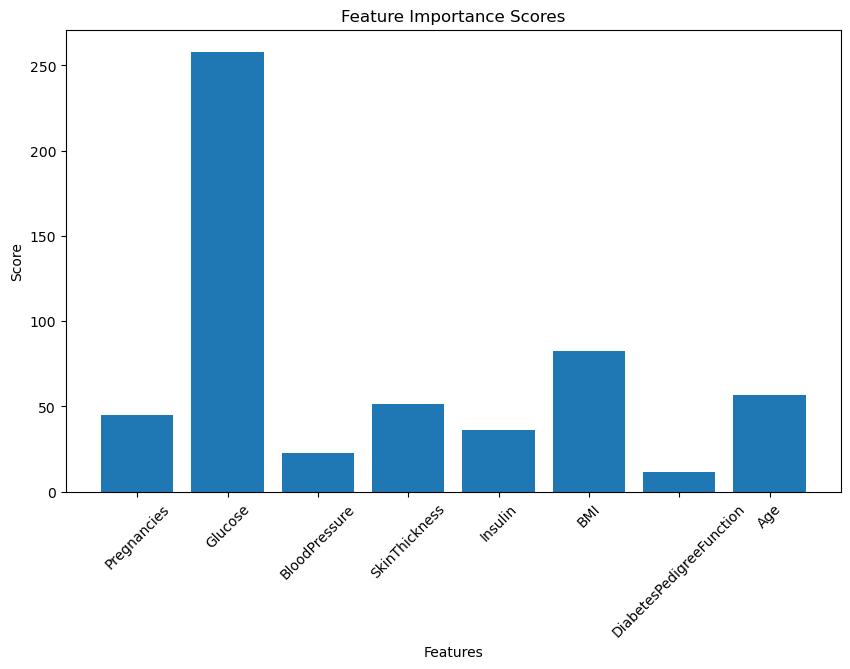

In [121]:
#Feature Importance
selector = SelectKBest(score_func=f_classif, k='all')
X_test_selected = selector.fit_transform(X_resampled_test, Y_resampled_test)
X_train_selected = selector.fit_transform(X_resampled_train, Y_resampled_train)
selected_features_indices = selector.get_support()
selected_features = X_resampled_train.columns[selected_features_indices]

# Assuming you already have selected_features from the previous code snippet
feature_scores = selector.scores_[selected_features_indices]

plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_scores)
plt.title("Feature Importance Scores")
plt.xlabel("Features")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

In [133]:
#Predicting the Outcome status from random samples from dataset

#Example: Let's check whether the person have diabetes or not using some random values
#Testing using predicted model
status_mapping = {0: 'Diabetic', 1: 'Non Diabetic'}

clf = RandomForestClassifier()

# Train (fit) the model
clf.fit(X_resampled_train, Y_resampled_train)

Y_predictions_tuned = clf.predict([[1,148,72,35,79.799,33.6,0.627,50]])
print(Y_predictions_tuned)
if Y_predictions_tuned==1:
    print("Diabetic")
else:
    print("Non Diabetic")


[1]
Diabetic


In [ ]:
-------------------------------------------------------------------------------------------------------------